## Importing important libraries

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from itertools import islice
from itertools import cycle
from sklearn.preprocessing import StandardScaler
import queue

# Loading and analysing the structure of the dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/512/Mall_Customers.csv')

rows = df.shape[0]
columns = df.shape[1]

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")
print(df.head())
print(df.info())

Number of rows: 200
Number of columns: 5
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


## Statistical Analysis of the data

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Exploratory Ananlysis of the datset

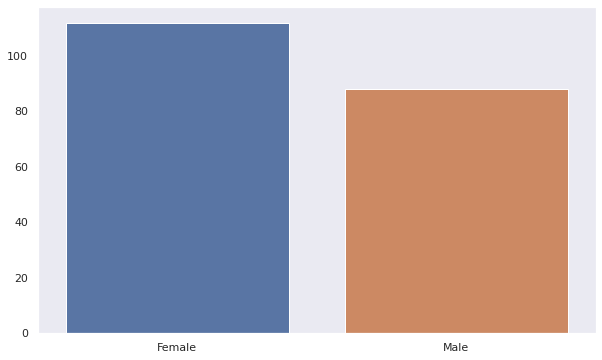

In [7]:
gender = df.Gender.value_counts()
sns.set(style="dark")
plt.figure(figsize=(10, 6))
sns.barplot(x=gender.index, y=gender.values)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

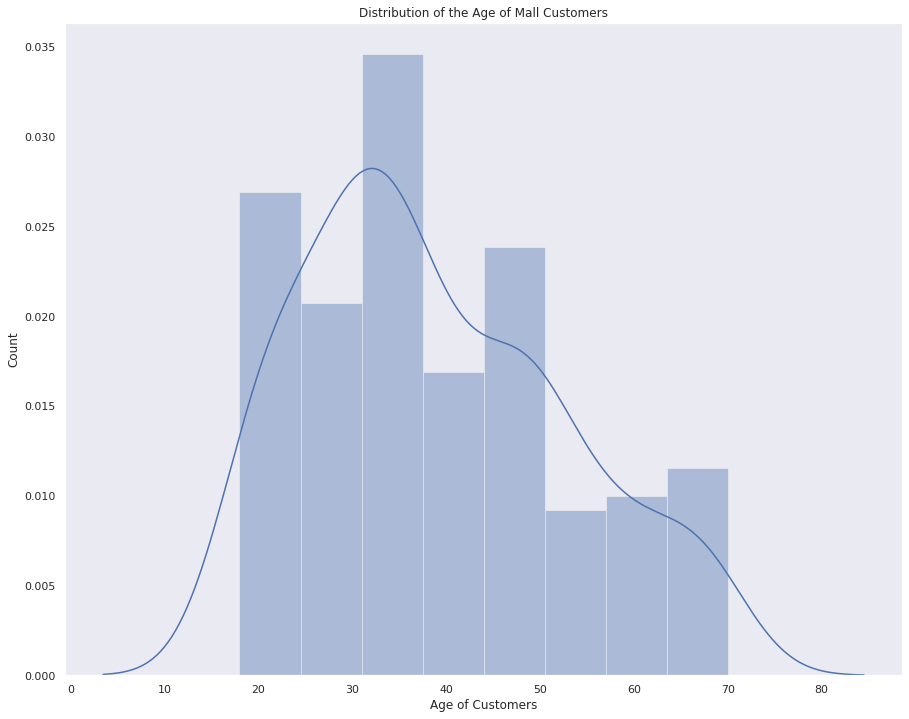

In [8]:
plt.figure(figsize=(15, 12))
sns.set(style = "dark")
sns.distplot(df["Age"])
plt.title("Distribution of the Age of Mall Customers", fontsize=12)
plt.xlabel('Age of Customers')
plt.ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

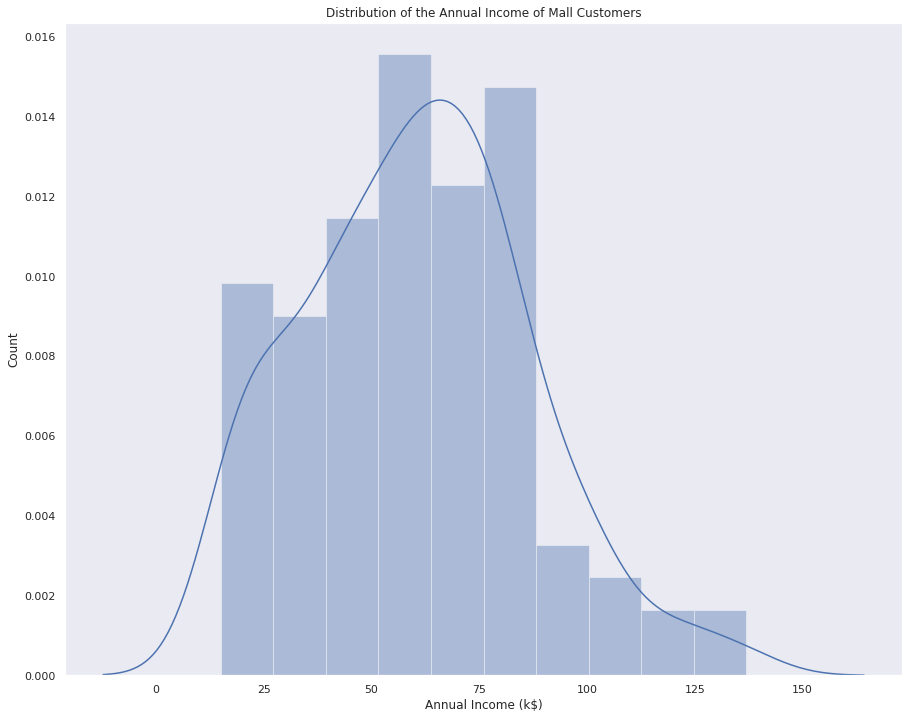

In [9]:
plt.figure(figsize=(15, 12))
sns.set(style = "dark")
sns.distplot(df["Annual Income (k$)"])
plt.title("Distribution of the Annual Income of Mall Customers", fontsize=12)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

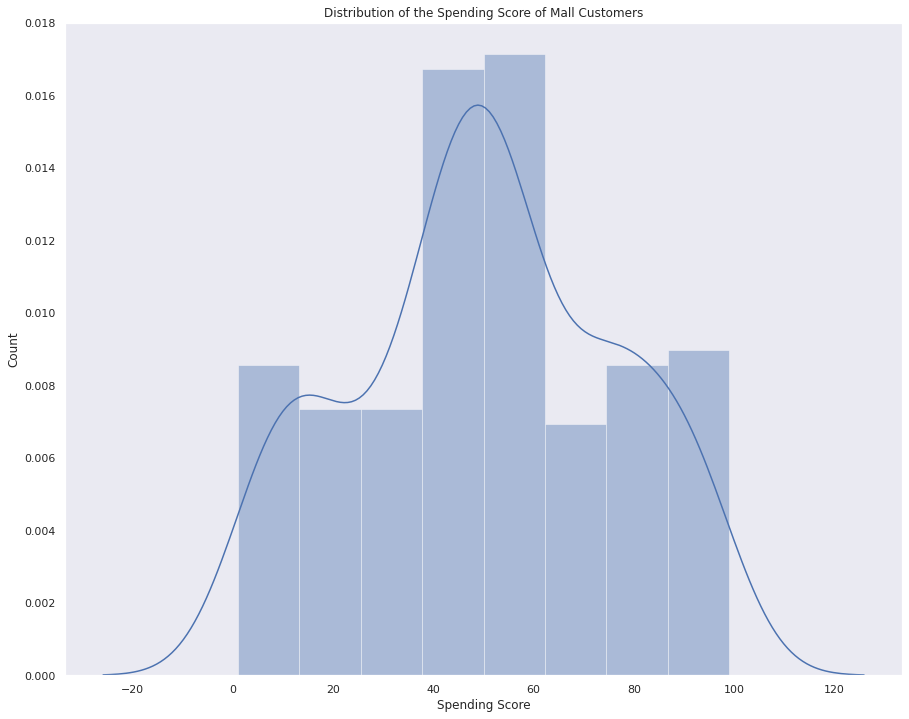

In [10]:
plt.figure(figsize=(15, 12))
sns.set(style = "dark")
sns.distplot(df["Spending Score (1-100)"])
plt.title("Distribution of the Spending Score of Mall Customers", fontsize=12)
plt.xlabel('Spending Score')
plt.ylabel('Count')

Correlation Between Spending Score and Age of Mall Customers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 100, 'Pearson: -0.33')

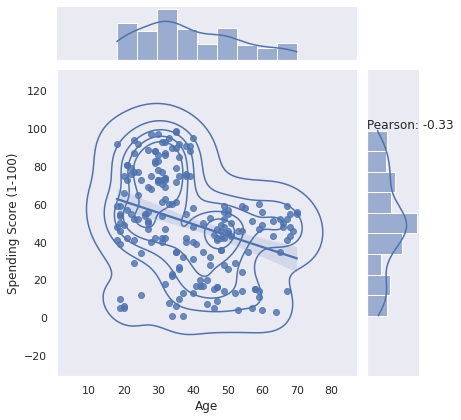

In [11]:
corr, _ = pearsonr(df['Age'], df['Spending Score (1-100)'])

jp = (sns.jointplot('Age', 'Spending Score (1-100)', data=df, kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(0,100, 'Pearson: {:.2f}'.format(corr))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 100, 'Pearson: 0.01')

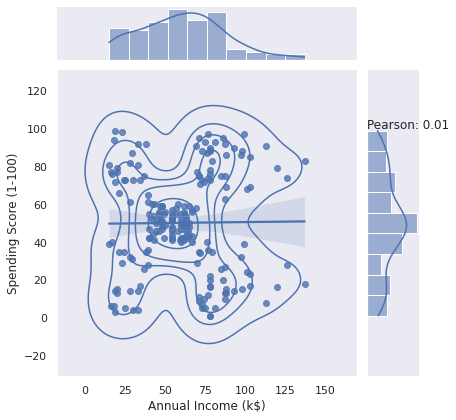

In [12]:
corr, _ = pearsonr(df['Annual Income (k$)'], df['Spending Score (1-100)'])

jp = (sns.jointplot('Annual Income (k$)', 'Spending Score (1-100)', data=df, kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(0,100, 'Pearson: {:.2f}'.format(corr))